# In this Notebook...

we present how different algorithms can be applied for a given participant with multiple days of recording from the MESA cohort, showing the differences in results from each one of those approaches.

Further, in this example we show how HypnosPy's built in non-wear detection can be used to process the file and get rid of days without enough recording time or where the devices was not worn appropriately. 

Through this process, we show the ease of use of our basic software functionalities in a multi-signal setting.

In [1]:
from hypnospy import Wearable
from hypnospy.data import MESAPreProcessing
from hypnospy.analysis import SleepWakeAnalysis, Viewer, NonWearingDetector

In [2]:
# MESAPreProcessing is a specialized class to preprocess Actiwatch devices used in the MESA Sleep experiment
preprocessed = MESAPreProcessing("../data/examples_mesa/mesa-sample.csv")

In [3]:
# Wearable is the main object in HypnosPy.
w = Wearable(preprocessed)

In [4]:
# In HypnosPy, we have the concept of ``experiment day'' which by default starts at midnight (00 hours).
# We can easily change it to any other time we wish. For example, lets run this script with experiment days
# that start at 3pm (15h)
w.change_start_hour_for_experiment_day(15)

In [5]:
# Sleep Wake Analysis module
sw = SleepWakeAnalysis(w)
sw.run_sleep_algorithm("ScrippsClinic", inplace=True) # runs alg and creates new col named 'ScrippsClinic'
sw.run_sleep_algorithm("Cole-Kripke", inplace=True)   # runs alg and creates new col named 'Cole-Kripke'
sw.run_sleep_algorithm("Oakley", inplace=True)        # runs alg and creates new col named 'Oakley'

w.data[["linetime", "activity", "ScrippsClinic", "Cole-Kripke", "Oakley"]]

,linetime,activity,ScrippsClinic,Cole-Kripke,Oakley
0,17:00:00,100.0,0,0,0
1,17:00:30,316.0,0,0,0
2,17:01:00,96.0,0,0,0
3,17:01:30,41.0,0,0,0
4,17:02:00,0.0,0,0,0
...,...,...,...,...,...
22998,16:39:00,NaN,1,1,1
22999,16:39:30,NaN,1,1,1
23000,16:40:00,NaN,1,1,1
23001,16:40:30,NaN,1,1,1


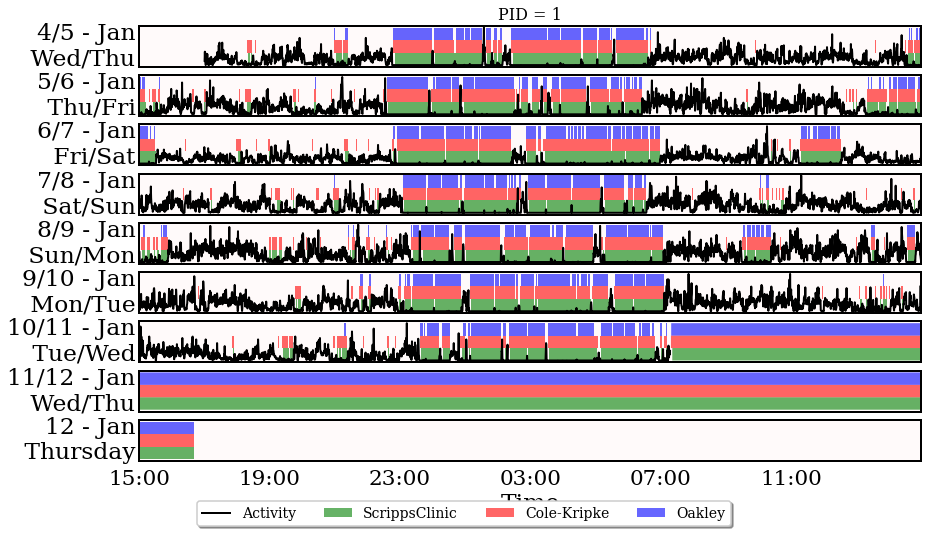

In [6]:
v = Viewer(w)
# Now we will plot each experiment day per row, all starting at 3pm.
# Left-hand plot: Note how the last two days have plenty of non-wear epochs
v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke", "Oakley"],
               colors={"area": ["green", "red", "blue"]}, alphas={"area": 0.6})

In [7]:
# Those can be removed with an algorithm like choi's.
nwd = NonWearingDetector(w)
nwd.detect_non_wear(strategy="choi")
nwd.check_valid_days(max_non_wear_minutes_per_day=180)
nwd.drop_invalid_days()

/home/palotti/p3/lib64/python3.8/site-packages/hypnospy-0.0.1-py3.8.egg/hypnospy/analysis/non_wearing_detector.py:70: UserWarning: It seems pid 1 has removed their device. Filling no activity with -0.0001.


Wearable now has a hyp_wearing col for the non wear flag


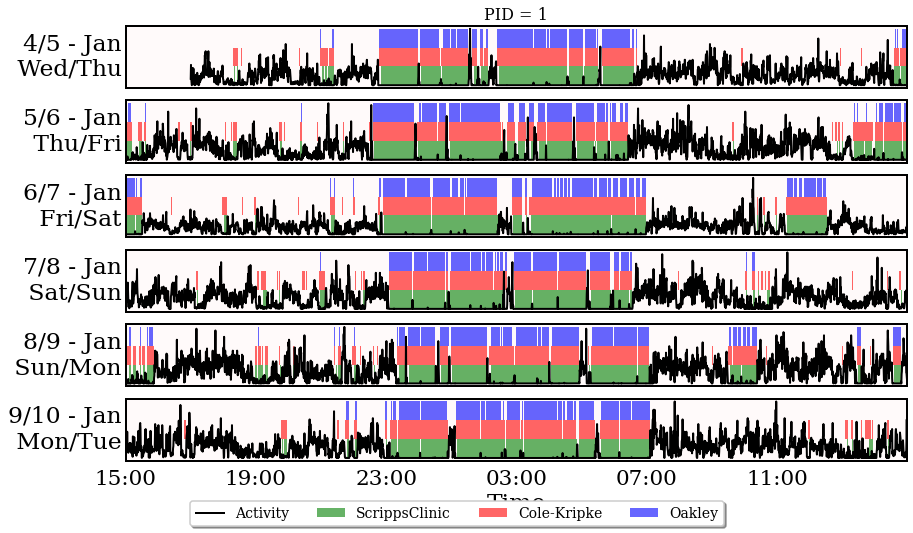

In [8]:
# Right-hand plot after removing days with large amount of non-wearing
v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke", "Oakley"],
               colors={"area": ["green", "red", "blue"]}, alphas={"area": 0.6})